<h1>Making Forecasts with Physiological Sensor Time Series Data</h1>


**Dataset**


Use the PAMAP2 Physical Activity Monitoring Data Set from https://archive.ics.uci.edu/ml/datasets/PAMAP2+Physical+Activity+Monitoring. This dataset collects a variety of physiological data for each of nine subjects: 

- Heart Rate (BPM)
- Temperature (Deg Celsius)
- 3D Acceleration Data
- 3D Gyroscope Data
- 3D Magnetometer data

Data was collected by subjects who wore three Colibri Wireless Inertial Measurement Units (IMU), one on her hand, one on her chest, and one on her ankle. 

<center><img src="https://est-kl.com/images/products/Trivisio/Trivisio_Colibri_wireless_intro.png"></img></center>


This is also an interesting dataset because it only contains one female subject out of nine total subjects. This particular subject, we'll call her <b>"Jane 102"</b>. 

* 25 yo
* 169 cm
* 78 kg
* Resting HR = 74 bpm
* Max HR = 195 bpm
* Right hand dominant


<img src="https://3dwarehouse.sketchup.com/warehouse/getpubliccontent?contentId=080169c1-8b81-4691-9377-60d9a3867d41"></img>

I've already provided Jane's data file in the Google Drive. So let's first start by setting up this Google Colab notebook and mounting your drive which should have the Jean Bartik Tutorial file folder already copied over to your personal Drive.

<b>Some Google Colab Tips</b>


<b>Change your runtime to GPU</b>, Ref: https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d
  
*   Edit > Notebook settings, or

*  Runtime>Change runtime type and select GPU as Hardware accelerator


  <b>Another Tip: How to Clear Outputs of All Cells</b>
* Follow Tools>>Command Palette>>Clear All Outputs

<b>Unfortunately</b>... As of this writing Google simply gives only 5% of GPU to some of us, whereas 100% to the others. https://stackoverflow.com/questions/48750199/google-colaboratory-misleading-information-about-its-gpu-only-5-ram-available

In [54]:
import tensorflow as tf
tf.test.gpu_device_name()

#if two commas, that means you're using the CPU!

'/device:GPU:0'

In [55]:
#Check your memory available

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

!cat /proc/meminfo

MemTotal:       13335268 kB
MemFree:         7313432 kB
MemAvailable:   10849892 kB
Buffers:           81116 kB
Cached:          2862048 kB
SwapCached:            0 kB
Active:          2381800 kB
Inactive:        3185880 kB
Active(anon):    1842760 kB
Inactive(anon):     8544 kB
Active(file):     539040 kB
Inactive(file):  3177336 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               408 kB
Writeback:             0 kB
AnonPages:       2624712 kB
Mapped:           627968 kB
Shmem:              9092 kB
Slab:             171044 kB
SReclaimable:     122640 kB
SUnreclaim:        48404 kB
KernelStack:        5396 kB
PageTables:        14780 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667632 kB
Committed_AS:    5271704 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:      2048 kB
ShmemHugePages:  

<b>Mount your Google Drive</b>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
!ls "/content/drive/My Drive/Jean Bartik Tutorial"

 1609.03499.pdf
 Build_RNN_Tutorial_Instructions.docx
 keras_causal.png
 log
 lstm_data.png
 model.h5
 mylstm.png
 my_matrix.dat
 my_matrix_y_train.dat
 Petty_03.jpg
 rnn_batch.png
 rnn_numpy.ipynb
 rnnpettynumpy.png
 rnn.png
 rnn_weights.png
 subject101.dat
 subject102.dat
 subject103.dat
 subject104.dat
 subject105.dat
 subject106.dat
 subject107.dat
 subject108.dat
 subject109.dat
 tboard.png
'Text Generation in Keras Tom Petty Lyrics.ipynb'
 timedistributed_lstm.png
 tom_3.hdf5
 tompetty.txt
 tutorial_rnn_lstm.ipynb
 tutorial_wavenet.ipynb
 walkforward.png
 WaveNet_gif.gif
 x_train_sensors
 youtube.png


#Load Data

This might take a few seconds...

In [0]:
import numpy as np
import pandas as pd

<b>For other interesting things to do after this tutorial, you could read in a different subject, located in the Google Drive folder.</b>

In [59]:
df = pd.read_table("/content/drive/My Drive/Jean Bartik Tutorial/subject102.dat", sep="\s+", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,5.64,0,NaN,33.0,2.79143,7.55389,-7.06374,2.87553,7.88823,-6.76139,...,-0.027148,-0.031190,-0.040897,-47.7695,-2.58701,59.8481,-0.012871,0.747947,-0.079841,0.658813
1,5.65,0,NaN,33.0,2.86086,7.43814,-7.21626,2.84248,7.63164,-6.85140,...,0.012803,-0.036384,-0.014846,-47.7624,-2.81438,60.3407,0.014025,-0.748410,0.079043,-0.658360
2,5.66,0,100.0,33.0,2.80997,7.09430,-7.52376,2.79373,7.43545,-7.07744,...,-0.001695,-0.034530,-0.040074,-47.5393,-2.38909,60.9623,0.012714,-0.749508,0.075286,-0.657577
3,5.67,0,NaN,33.0,2.77138,6.98077,-7.52396,2.80627,7.29929,-7.24326,...,0.055437,-0.011560,0.015434,-47.4246,-2.72082,60.7103,0.012639,-0.749201,0.076030,-0.657843
4,5.68,0,NaN,33.0,2.76710,7.13119,-7.67848,2.78766,7.11797,-7.48445,...,0.017184,-0.034663,0.007239,-47.5412,-2.60153,60.3412,0.012571,-0.749291,0.076346,-0.657705


Each of the data-files contains 54 columns per row, the columns contain the following data:
* 1 timestamp (s)
* 2 activityID (see II.2. for the mapping to the activities)
*  3 heart rate (bpm)
* 4-20 IMU hand
* 21-37 IMU chest
* 38-54 IMU ankle


For **EACH** of the IMU's above, the data are structured in columns as follows:

* 1        temperature (in ∘C).
* 2 to 4         3D acceleration data (ms−2), scale ±16 g.
* 5 to 7         3D acceleration data (ms−2), scale ±6 g.
* 8 to 10       3D gyroscope data (rad/s), scale ±2000 ∘/s.
* 11 to 13  3D magnetometer data (μT), scale ±1.3 Ga.
* 14 to 17  orientation

3D data is (x, y, z) like (pitch, roll and yaw)

<img src="https://www.researchgate.net/profile/Martin_Molina4/publication/304816895/figure/fig11/AS:667910355812385@1536253646890/Hand-gesture-commands-used-for-drone-flight-In-this-setup-positive-pitch-roll-and-yaw.jpg"></img>


<h2>Hand IMU Dataset</h2>

We'll take the: 

* 1st column - Timestamp
* 2nd column - Activity ID
* 4th column - IMU Hand Temperature
* 5th column - IMU Hand Acceleration ±16 g (Pitch)
* 8th - IMU Hand Acceleration ±6 g (Pitch)
* 11th - IMU Hand Gyroscope Data (Pitch)
* 14th - IMU Hand Magnetometer Data (Pitch)

In [8]:
hand_dataset = df[[0, 1, 3, 4, 7, 10, 13]]
hand_dataset.head()

,0,1,3,4,7,10,13
0,5.64,0,33.0,2.79143,2.87553,1.01640,-11.6508
1,5.65,0,33.0,2.86086,2.84248,1.08269,-11.6575
2,5.66,0,33.0,2.80997,2.79373,1.14829,-11.7615
3,5.67,0,33.0,2.77138,2.80627,1.24888,-11.2109
4,5.68,0,33.0,2.76710,2.78766,1.27178,-10.8648


In [60]:
#get sitting(2), running(5), ascending stairs(12), vacuum cleaning(16)


sit = hand_dataset.loc[hand_dataset[1] ==2]
print(len(sit))



22345


In [61]:
#Each activity has an activity code 

run = hand_dataset.loc[hand_dataset[1] ==5]
stairs = hand_dataset.loc[hand_dataset[1] ==12]
vac = hand_dataset.loc[hand_dataset[1] ==16]

print("running data len", len(run))
print("stairs data len", len(stairs))
print("vacuum cleaning data len", len(vac))

running data len 9238
stairs data len 17342
vacuum cleaning data len 20683


In [0]:
def prep_df(df):
  new = df.copy().reset_index()
  new.drop('index', axis=1, inplace=True)
  return new

sit2 = prep_df(sit)
run2 = prep_df(run)
stairs2 = prep_df(stairs)
vac2 = prep_df(vac)


<h2>Overview of our Hand Dataset</h2>


<table style="width:100%">
  <tr align=left>
    <th>Activity</th>
    <th>Protocol</th>
    <th>Protocol Minutes</th>
    <th>Seconds</th>
    <th>Records*</th> 
    <th>Code</th>
  </tr>
  <tr>
    <td>Sitting</td>
    <td>writing, desk work, typing</td>
    <td>3 minutes</td> 
    <td>223.44</td>
    <td>22345</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Running</td>
    <td>jogging (general), running 5mph</td>
    <td>3 minutes</td> 
    <td>92.37</td>
    <td>9238</td>
    <td>5</td>
  </tr>
    <tr>
    <td>Ascending Stairs</td>
      <td>walking upstairs</td>
    <td>2 minutes</td> 
    <td>173.44</td>
    <td>17342</td>
    <td>12</td>
  </tr>
  <tr>
    <td>Vacuum Cleaning</td>
    <td>vacuuming</td>
    <td>3 minutes</td> 
    <td>206.8</td>
    <td>20683</td>
    <td>16</td>
</tr>
</table>


*IMU is sampled at 100 Hz frequency



<h2>sitting – writing, desk work, typing</h2>

In [63]:
sit2.head()

,0,1,3,4,7,10,13
0,352.16,2,33.8125,-9.20318,-9.05445,0.027396,29.0299
1,352.17,2,33.8125,-9.20077,-9.09992,0.005702,29.1336
2,352.18,2,33.8125,-9.27823,-9.10043,0.012111,29.0230
3,352.19,2,33.8125,-9.27956,-9.07029,0.007302,29.0253
4,352.20,2,33.8125,-9.21200,-9.08573,0.012445,28.8073


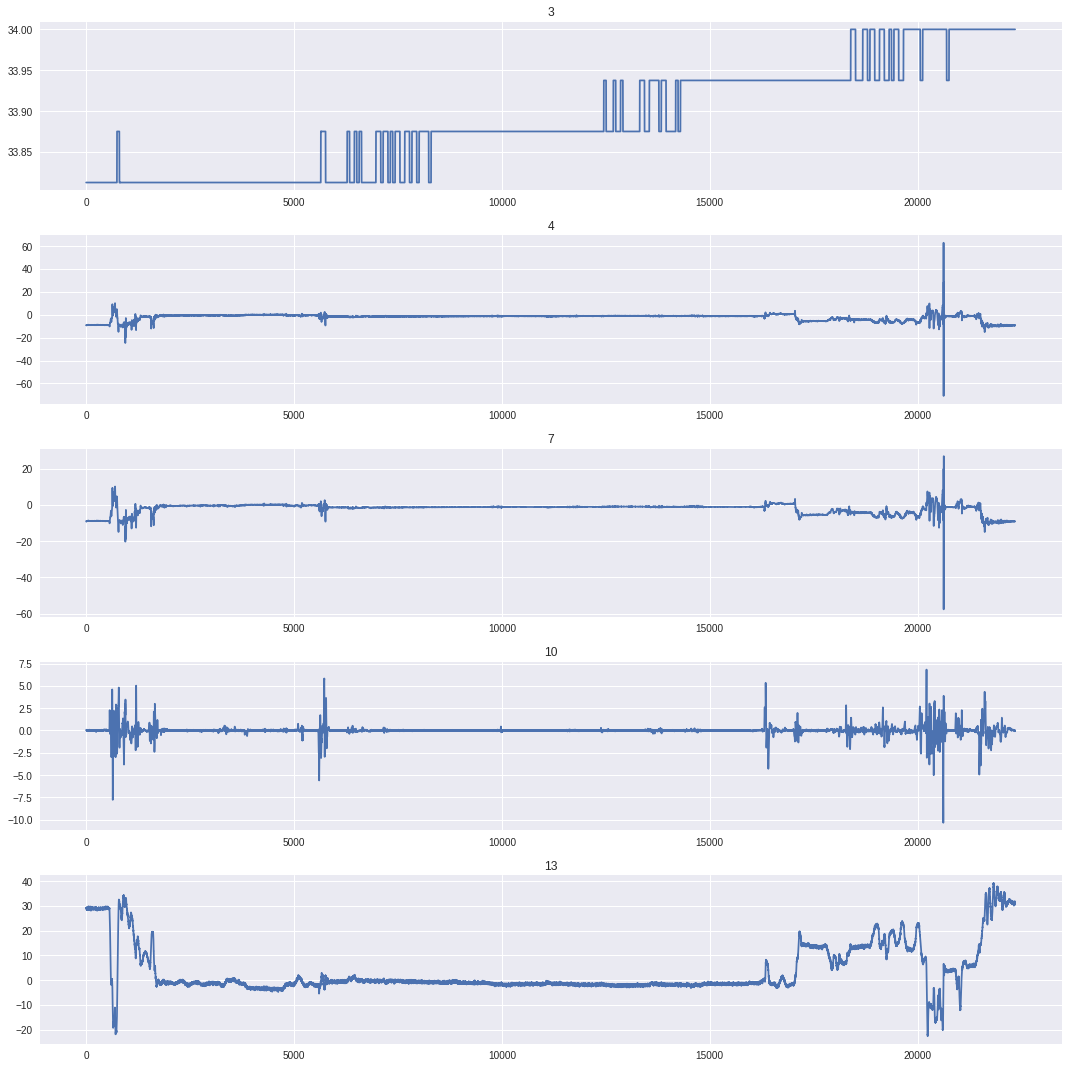

In [64]:
import matplotlib.pyplot as plt

def plotter(df):
  # Visualize response variable (total count) with other vars in hourly dataset
  col_list = [3, 4, 7, 10, 13]
  fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize=(15,15))
  for i in range(len(col_list)):
    ax[i].plot(df[col_list[i]], label=col_list[i])
    ax[i].set_title(col_list[i])
  plt.tight_layout()
  plt.show()
  
plotter(sit2)

<h2>(12020: jogging, general)
(12030: running, 5mph)</h2>

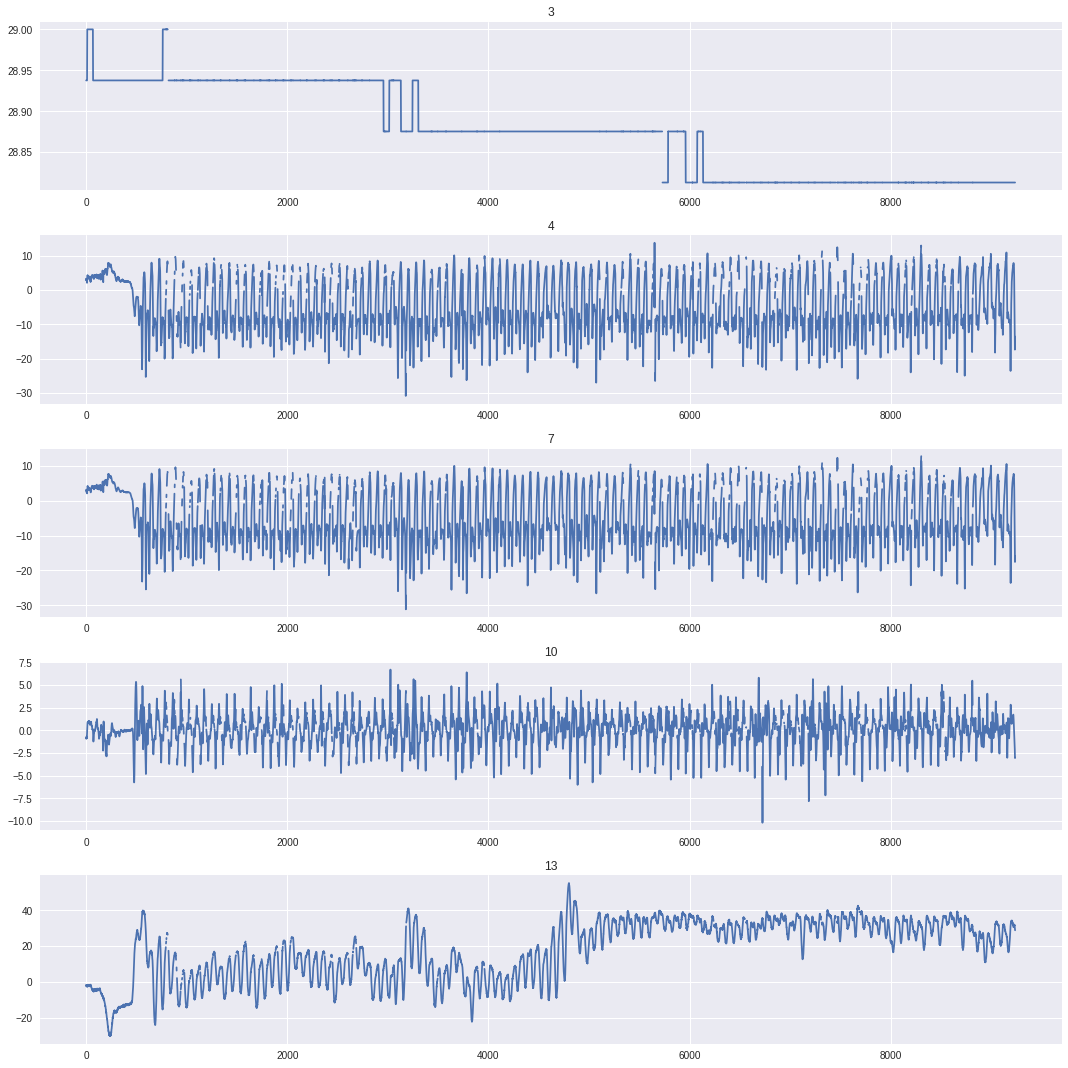

In [65]:
plotter(run2)

<h2>walking upstairs</h2>

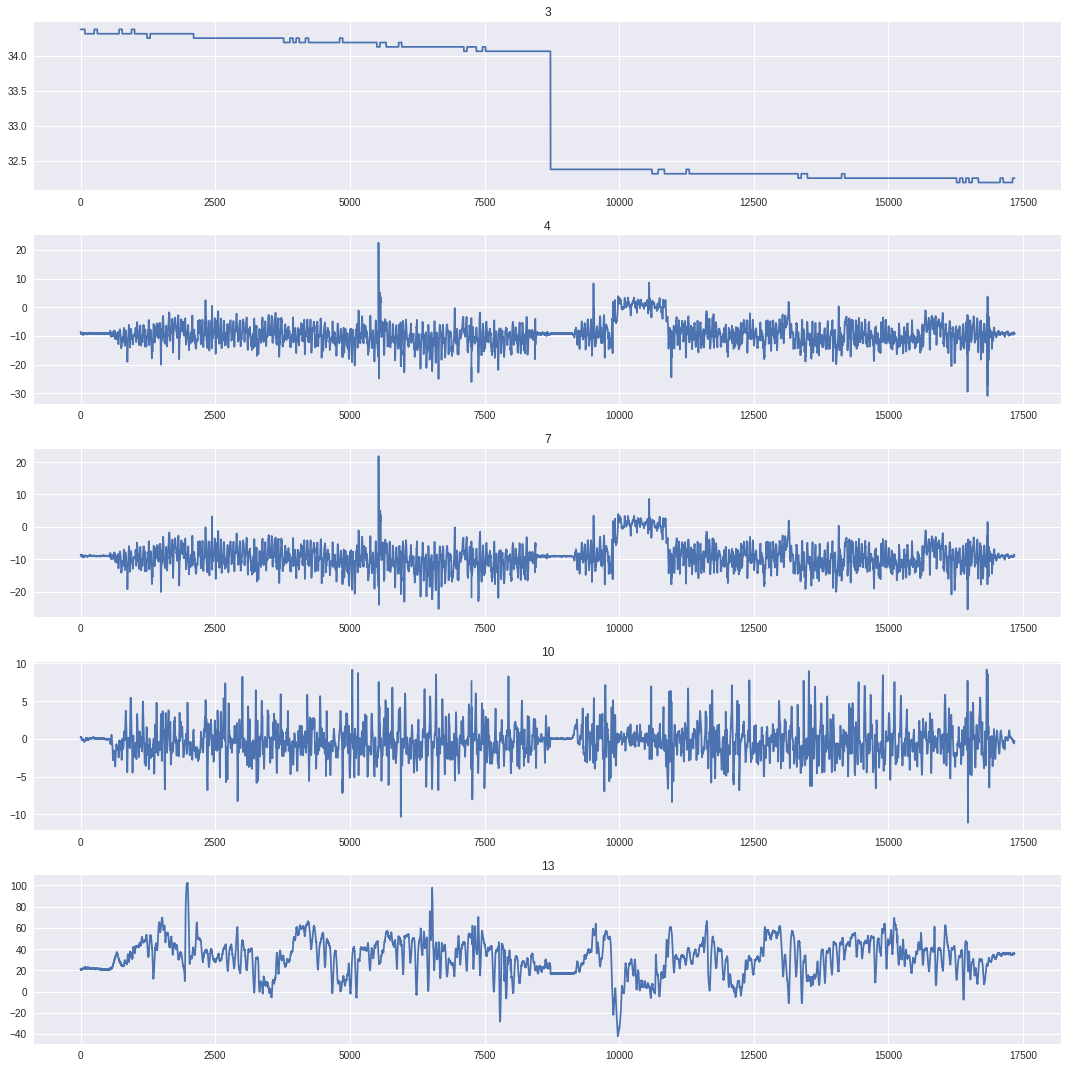

In [66]:
plotter(stairs2)

<h2>Vacuuming!</h2>

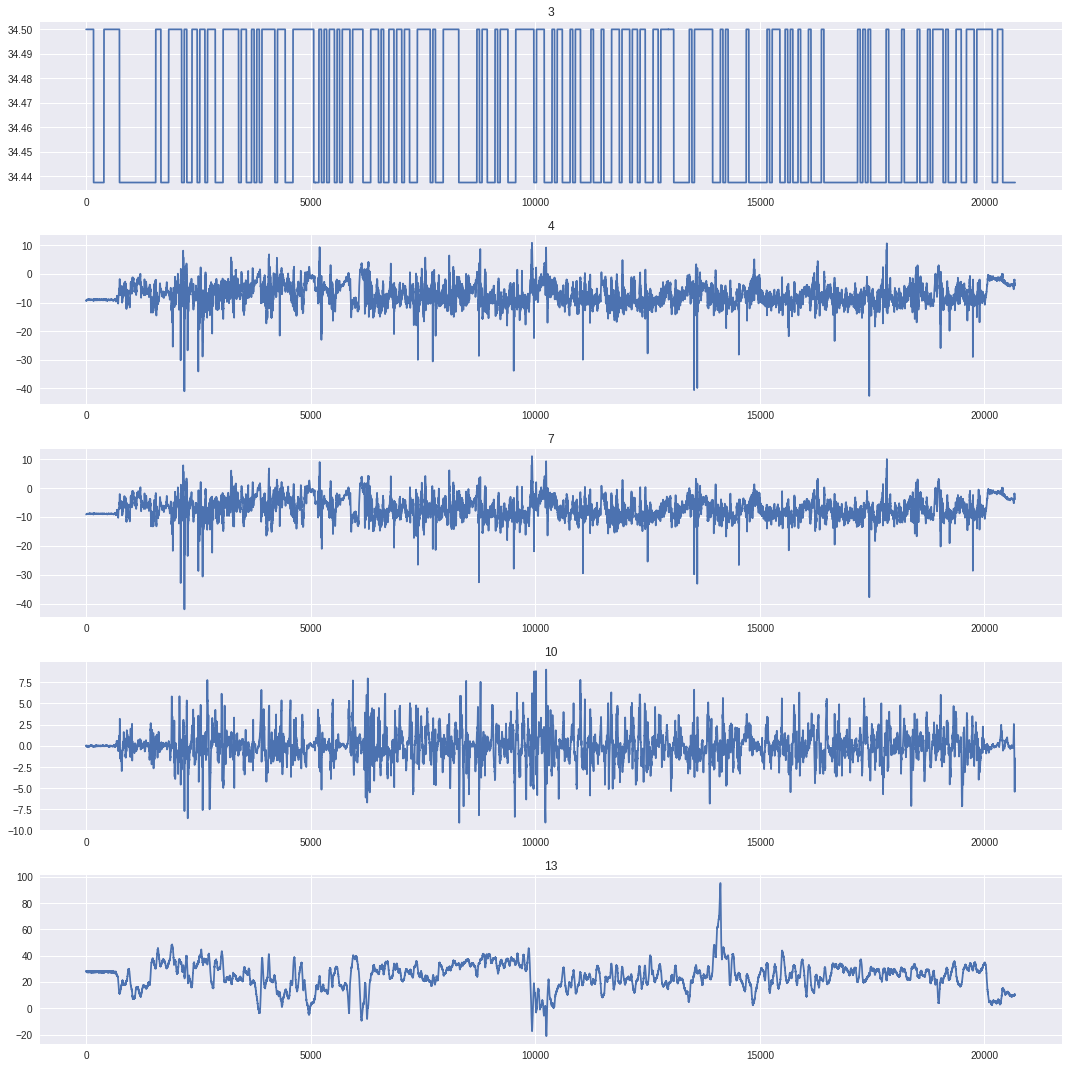

In [67]:
plotter(vac2)

#Prepare and Transform Data

**Only get the columns of measurements**

In [0]:
cols = [3, 4, 7, 10, 13]

sit_ = sit2[cols]
run_ = run2[cols]
stairs_ = stairs2[cols]
vac_ = vac2[cols]

In [69]:
sit_.head()

,3,4,7,10,13
0,33.8125,-9.20318,-9.05445,0.027396,29.0299
1,33.8125,-9.20077,-9.09992,0.005702,29.1336
2,33.8125,-9.27823,-9.10043,0.012111,29.0230
3,33.8125,-9.27956,-9.07029,0.007302,29.0253
4,33.8125,-9.21200,-9.08573,0.012445,28.8073


Quick note - If you don't fill in the NaN's then during your training, you'll end up with a curious loss of "NaN". It was such a simple fix (as most things usually are), but it really perplexed me for a long time. 

In [70]:
sit_.fillna(value=0, inplace=True)
print(sit_.shape)

(22345, 5)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [71]:
def standardized_matrix(df):
    #hard-coded where magnetometer is the first value which will be our target, for convenience
    #YOU CAN CHANGE THIS TO FORECAST ANOTHER VALUE LIKE THE TEMPERATURE - WHICH WOULD BE '3'
    dataframe = df[[13, 3, 4, 7, 10]]
    #first convert to a 2d tensor of shape (timesteps, features)
    matrix = dataframe.values
    print(matrix)
    #Normalize the whole matrix 
    mean = matrix.mean(axis=0)
    print(mean)
    matrix -= mean
    std = matrix.std(axis=0)
    matrix /= std
    print (matrix.shape)
    return matrix 
    
new_matrix = standardized_matrix(sit_)

[[ 2.90299e+01  3.38125e+01 -9.20318e+00 -9.05445e+00  2.73964e-02]
 [ 2.91336e+01  3.38125e+01 -9.20077e+00 -9.09992e+00  5.70234e-03]
 [ 2.90230e+01  3.38125e+01 -9.27823e+00 -9.10043e+00  1.21106e-02]
 ...
 [ 3.14261e+01  3.40000e+01 -9.21835e+00 -9.06422e+00 -6.88330e-03]
 [ 3.08714e+01  3.40000e+01 -9.25347e+00 -9.06333e+00 -4.47241e-02]
 [ 3.16543e+01  3.40000e+01 -9.22076e+00 -9.07866e+00 -8.80064e-03]]
[ 3.45055518e+00  3.38855616e+01 -2.20800330e+00 -2.05816473e+00
 -8.87951469e-03]
(22345, 5)


In [72]:
new_matrix

array([[ 2.58403623e+00, -2.23309338e-01, -2.46233149e+00,
        -2.51247306e+00,  6.24615841e-02],
       [ 2.59451205e+00, -2.23309338e-01, -2.46148316e+00,
        -2.52880203e+00,  2.51077265e-02],
       [ 2.58333919e+00, -2.23309338e-01, -2.48874941e+00,
        -2.52898518e+00,  3.61417714e-02],
       ...,
       [ 2.82610137e+00,  3.49775210e-01, -2.46767139e+00,
        -2.51598162e+00,  3.43717678e-03],
       [ 2.77006534e+00,  3.49775210e-01, -2.48003378e+00,
        -2.51566200e+00, -6.17189009e-02],
       [ 2.84915423e+00,  3.49775210e-01, -2.46851972e+00,
        -2.52116724e+00,  1.35810161e-04]])

#Create input sequences to forecast magnetometer data

In [73]:
#our MAGNETOMETER target value
new_matrix[:, 0]

array([2.58403623, 2.59451205, 2.58333919, ..., 2.82610137, 2.77006534,
       2.84915423])

In [74]:
new_matrix[1:len(new_matrix)] #to demonstrate 1 shift out

array([[ 2.59451205e+00, -2.23309338e-01, -2.46148316e+00,
        -2.52880203e+00,  2.51077265e-02],
       [ 2.58333919e+00, -2.23309338e-01, -2.48874941e+00,
        -2.52898518e+00,  3.61417714e-02],
       [ 2.58357154e+00, -2.23309338e-01, -2.48921757e+00,
        -2.51816145e+00,  2.78619761e-02],
       ...,
       [ 2.82610137e+00,  3.49775210e-01, -2.46767139e+00,
        -2.51598162e+00,  3.43717678e-03],
       [ 2.77006534e+00,  3.49775210e-01, -2.48003378e+00,
        -2.51566200e+00, -6.17189009e-02],
       [ 2.84915423e+00,  3.49775210e-01, -2.46851972e+00,
        -2.52116724e+00,  1.35810161e-04]])

Shift the magnotometer to one time step out. If you wanted to shift it out to several more values ahead, you might want to change:

    target[1:len(target)]
    
 to: 
 
     target[timesteps_out:len(target)]

In [75]:
def transform(matrix):
    target = matrix[:, 0] #our MAGNETOMETER target value
    target_shifted = target[1:len(target)] #all the MAGNETOMETER values shifted by 1 at index 1
    #13, 3, 4, 7, 10
    #take each feature's index value
    temp = matrix[:, 1] #3
    a1 = matrix[:, 2] #4
    a2 = matrix[:, 3] #7
    gy = matrix[:, 4] #10
    
    #convert all to series
    s_temp = pd.Series(temp)
    s_a1 = pd.Series(a1)
    s_a2 = pd.Series(a2)
    s_gy = pd.Series(gy)
    s_mag = pd.Series(target_shifted) #converting to a series 
    
    #reshape this into a matrix where each "i" is a feature
    ts_new = pd.concat([s_temp, s_a1, s_a2, s_gy, s_mag], axis=1)
    
    ts_new_all = ts_new.loc[0:22343] #the len is 22,345, but for this tutorial I need it even at 22,344 taking out one value to make even splits of 3
    
    #convert it back to a matrix of values , the last value is the target now (index 4)
    tfd_matrix = ts_new_all.values
    print(tfd_matrix.shape)
    print(tfd_matrix[:4])
    return tfd_matrix

sequence_matrix = transform(new_matrix)

(22344, 5)
[[-0.22330934 -2.46233149 -2.51247306  0.06246158  2.59451205]
 [-0.22330934 -2.46148316 -2.52880203  0.02510773  2.58333919]
 [-0.22330934 -2.48874941 -2.52898518  0.03614177  2.58357154]
 [-0.22330934 -2.48921757 -2.51816145  0.02786198  2.56154909]]


In [76]:
3*7448

22344

In [0]:
def timesequences(sequence_matrix, a, b):

    #timedistributed must take the exact same length for test and train (like padding a sentence)
    train = sequence_matrix[:a] 
    valid = sequence_matrix[a:b]
    test = sequence_matrix[b:]

    #slice the 5 features versus the target
    train_X, train_y = train[:, :4], train[:, 4] #x: indices 0 to 3 (temp through gyro); y: index 4 only (magnetometer)
    valid_X, valid_y = valid[:, :4], valid[:, 4]
    test_X, test_y = test[:, :4], test[:, 4]

    # reshape input to be 3D tensor with shape (batch_size, timesteps, input_dim)
    # needs to be (1, 7448, 5)
    train_X = train_X.reshape((1, train_X.shape[0], train_X.shape[1]))
    train_y = train_y.reshape((1, train_y.shape[0], 1))

    valid_X = valid_X.reshape((1, valid_X.shape[0], valid_X.shape[1]))
    valid_y = valid_y.reshape((1, valid_y.shape[0], 1))

    test_X = test_X.reshape((1, test_X.shape[0], test_X.shape[1]))
    test_y = test_y.reshape((1, test_y.shape[0], 1))

    print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape, test_X.shape, test_y.shape)
    return train_X, train_y, valid_X, valid_y, test_X, test_y

In [78]:

train_X, train_y, valid_X, valid_y, test_X, test_y = timesequences(sequence_matrix, 7448,7448*2)

(1, 7448, 4) (1, 7448, 1) (1, 7448, 4) (1, 7448, 1) (1, 7448, 4) (1, 7448, 1)


In [79]:
list(train_X) #all our values temp, ac1, ac2, gyro

[array([[-0.22330934, -2.46233149, -2.51247306,  0.06246158],
        [-0.22330934, -2.46148316, -2.52880203,  0.02510773],
        [-0.22330934, -2.48874941, -2.52898518,  0.03614177],
        ...,
        [-0.03228116,  0.21039054,  0.26170338, -0.00971636],
        [-0.03228116,  0.26604593,  0.26688541,  0.03950695],
        [-0.03228116,  0.22613921,  0.26143045,  0.03336185]])]

In [80]:
train_X[0][0] #earliest timestep

array([-0.22330934, -2.46233149, -2.51247306,  0.06246158])

In [81]:
train_X[0][7447] #most recent timestep

array([-0.03228116,  0.22613921,  0.26143045,  0.03336185])

In [82]:
train_y #our target, magnetometer, shifted 1 time step out

array([[[ 2.59451205],
        [ 2.58333919],
        [ 2.58357154],
        ...,
        [-0.359234  ],
        [-0.43945391],
        [-0.37017229]]])

In [83]:
len(train_X[0])

7448

In [84]:
print(train_X.shape)

(1, 7448, 4)


#What is a Recurrent Neural Network? 

Let's first start by introducing what a RNN is.  



**1.   RNN's map an input sequence to an output sequence.**


RNNs can be used in interesting sequencing tasks. Ranging from machine language translation to time series forecasting (which is what we're doing today.)

<img src="https://smerity.com/media/images/articles/2016/gnmt_arch_1_enc_dec.svg"></img>


<b>2.   It does this by passing the calculated weights for the hidden state back to itself ("recurrent")</b>


>> $h_i = tanh(W*h_i + U*X_i)$ where <i>W</i> is the weight matrix for the hidden state and <i>U</i> is the weight matrix for the input data 


<b>3. And the new hidden state is then used to calculate the output, or the prediction</b>

>>$y_i = \sigma(V*h_i)$ where <i>V</i> is the weight matrix of the outputs (or predictions)

You may have seen diagrams like this: 

<img src="https://cdn-images-1.medium.com/max/1600/0*YNLOjW7YVJarwMD4.png"></img> from <i>Chris Olah</i>

One way I like to understand what's happening inside a typical RNN unit - here labeled as <b>A</b> is to use this diagram inspired from a publication by Cashman, et al: 






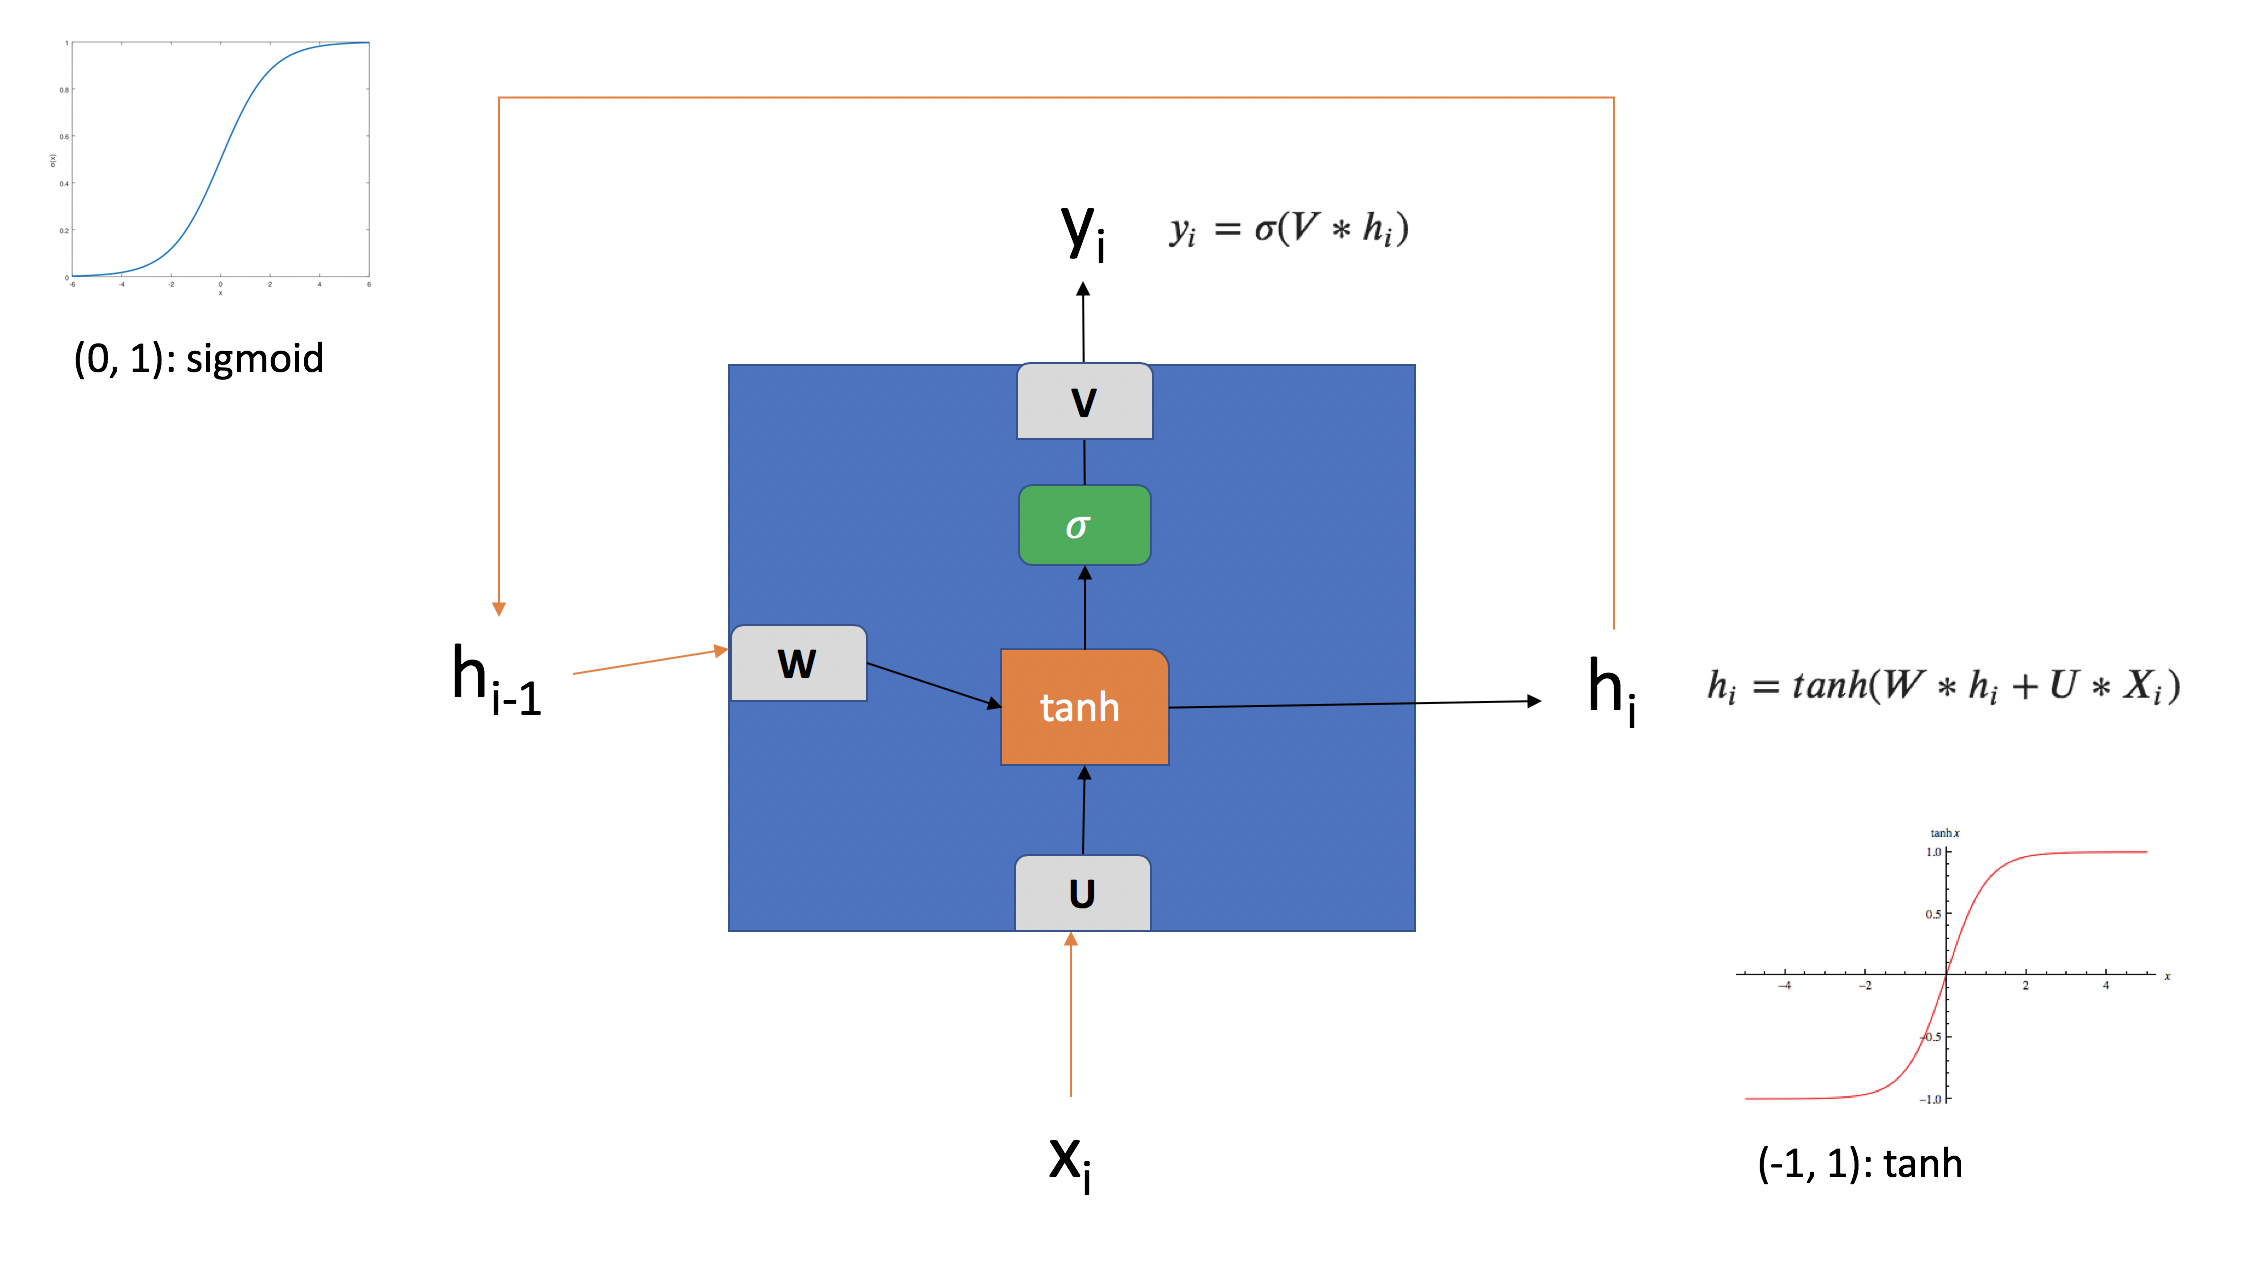

In [34]:
from IPython.display import Image
Image('/content/drive/My Drive/Jean Bartik Tutorial/rnn.png', width=800, height=450)

When we unroll this network within a batch_size of let's say `batch_size=6`, here's how it looks: 

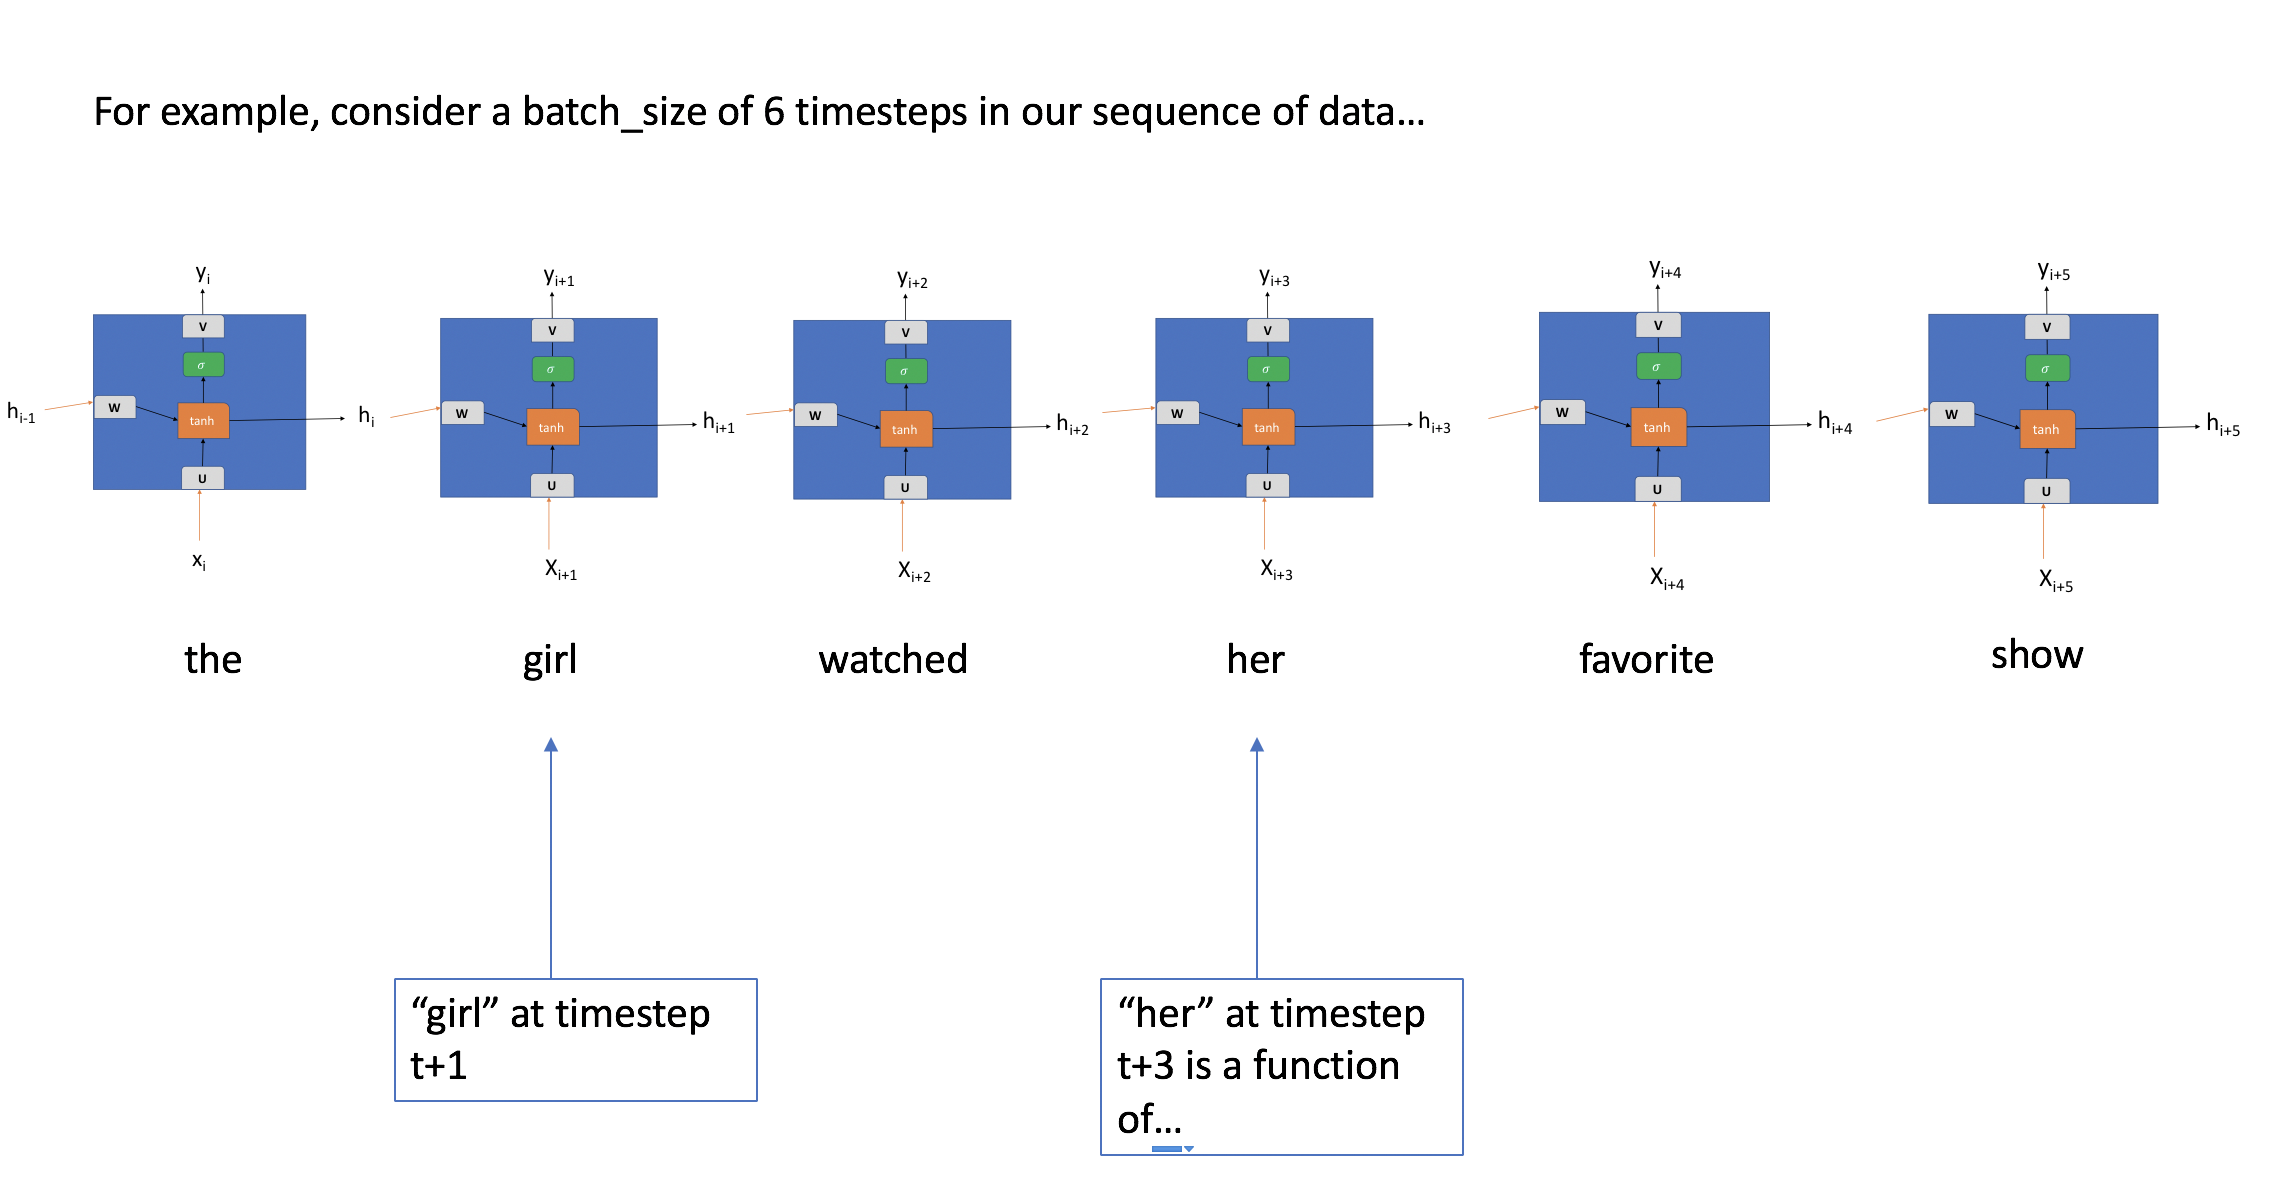

In [85]:
Image('/content/drive/My Drive/Jean Bartik Tutorial/rnn_batch.png', width=1000, height=500)

In this <b>Simple RNN</b>, within a batch for the input sequence, X, a few things are important to know: 

* The weights W, U, and V are shared. 
* In this example, an output (prediction), $y_i$ is outputted at every timestep. 
* A loss function, for example the <b>Mean Absolute Error</b> is used to calculate the loss at each timestep. 

>> 
  $MAE = \frac{\sum\limits_{i=1}^n |y_i - y_t|}{n}$  
  - where $y_i $ is the output/prediction and $y_t$ is the true value
  


*   We sum up all the losses calculated between the output and the true value at each timestep


>> 
  $L = \sum\limits_{i=1}^nL_t$ ,where L is the MAE


* This is important because the RNN needs the gradient of the loss, <i>L</i> with respect to the weights, <i>W</i> of the hidden states. <br>

>> <font size=4>
$\frac{\partial L}{\partial W} = \sum\limits_{i=1}^n\frac{\partial L_t}{\partial W}$
</font>

* These gradients are computed at each batch and the weights are optimized using gradient descent. 
* The updated weights W, U, and V are then ready for the next forward and backward pass in the network for the next batch of data. 
* This is called <b>back propagation through time (BPTT)</b>

>><font size=4>
$\frac{\partial L_i}{\partial W} = \sum\limits_{i=1}^n\frac{\partial L_i}{\partial y_i}*\frac{\partial y_i}{\partial W}$
</font>


<img src="https://s3.ap-south-1.amazonaws.com/techleer/191.png"></img>

* The gradients flow backwards...

Here's what that looks like at a high-level mathematically: 

>>
The <font size=4>$\frac{\partial y_i}{\partial W}$</font> term can be expanded using the chain rule...

>> <font size=4>$\frac{\partial L_i}{\partial W} = \frac{\partial L_i}{\partial y_i}*(\frac{\partial y_i}{\partial h_i}*\frac{\partial h_i}{\partial W})$</font>

The <font size=4>$\frac{\partial h_i}{\partial W}$</font> can be farther expanded using the product rule...

>><font size=4>$\frac{\partial h_i}{\partial W} = tanh'(U_{x_i} + W_{h_{i-1}})[h_{i-1} + W\frac{\partial h_{i-1}}{\partial W}]$
  </font>
  

Well, at this point, we can continue expanding the <font size=4> $\frac{\partial h_{i-1}}{\partial W}$ </font> term all the way to $\frac{\partial h_{1}}{\partial W}$


Let's say we have a batch of 6 and we start at the 6th timestep: 

>> <font size=4>$\frac{\partial L_6}{\partial W} = \frac{\partial L_6}{\partial y_6}*\frac{\partial y_6}{\partial h_6}*tanh'(U_{x_6} + W_5)[h_5 + W\frac{\partial h_5}{\partial W}]$</font>

The <font size=5>$\frac{\partial h_5}{\partial W}$ </font> can be farther expanded for: 

<font size=5>


  $\frac{\partial h_4}{\partial W}$ <p>


  $\frac{\partial h_3}{\partial W}$ <p>


  $\frac{\partial h_2}{\partial W}$ <p>


  $\frac{\partial h_1}{\partial W}$ <p>
  
</font>

* With a simple RNN like this example, there is the problem of "vanishing gradients", meaning the farther back the loss is propagated, the rate approaches zero meaning that information about the sequence properties are not saved. This is solved using <b>Long Short Term Memory Units</b>. 


<img src="https://jhui.github.io/assets/rnn/lstm.png"></img>

Reference: https://jhui.github.io/2017/03/15/RNN-LSTM-GRU/

What's changed now is that there is an extra state called the <b>C</b> cell state. 

It combines the previous cell's hidden state with new information that's modulated through three additional "gates" or sets of mathematic operations. This creates an updated <b>C</b> cell state that's passed to the next LSTM cell. Some of you have probably seen the LSTM overview by Chris Olah. Below is my interpretation to help go through the math. 

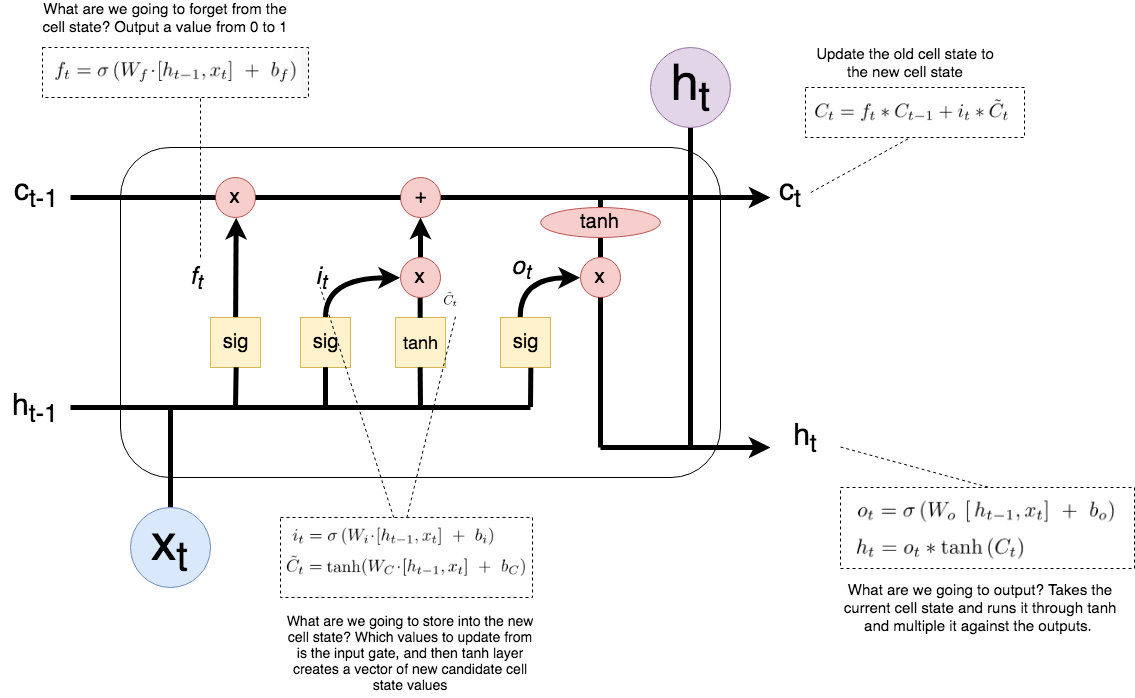

In [36]:
Image('/content/drive/My Drive/Jean Bartik Tutorial/mylstm.png', width=1000, height=600)

$f_t = \sigma(W_f*[h_{t-1}, x_t] + b_f) $ # forget vector, use the previous hidden state and the current timestep input

$i_t = \sigma(W_i*[h_{t-1}, x_t], + b_i)$ #input vector, use the previous hidden state and the current timestep input

$\widetilde{C}_t = tanh(W_c*[h_{t-1}, x_t] + b_c)$ #new candidate cell state values, use the previous hidden state and the current timestep input

$o_t = \sigma(W_o*[h_{t-1}, x_t] + b_o) $ #output vector, use the previous hidden state and the current timestep input

$h_t = o_t * tanh(C_t)$ #current hidden state is now the output vector * the tanh of the existing cell state

$C_t = f_t*C_{t-1} + i_t * \widetilde{C}_t$ #the new updated cell state

<h1>Let's take a deeper look - Switch to the RNN NUMPY Notebook</h1>

<b>Here's one of the simplest easiest explanations of LSTM operations that I've seen online. Let's take a break and review. </b>

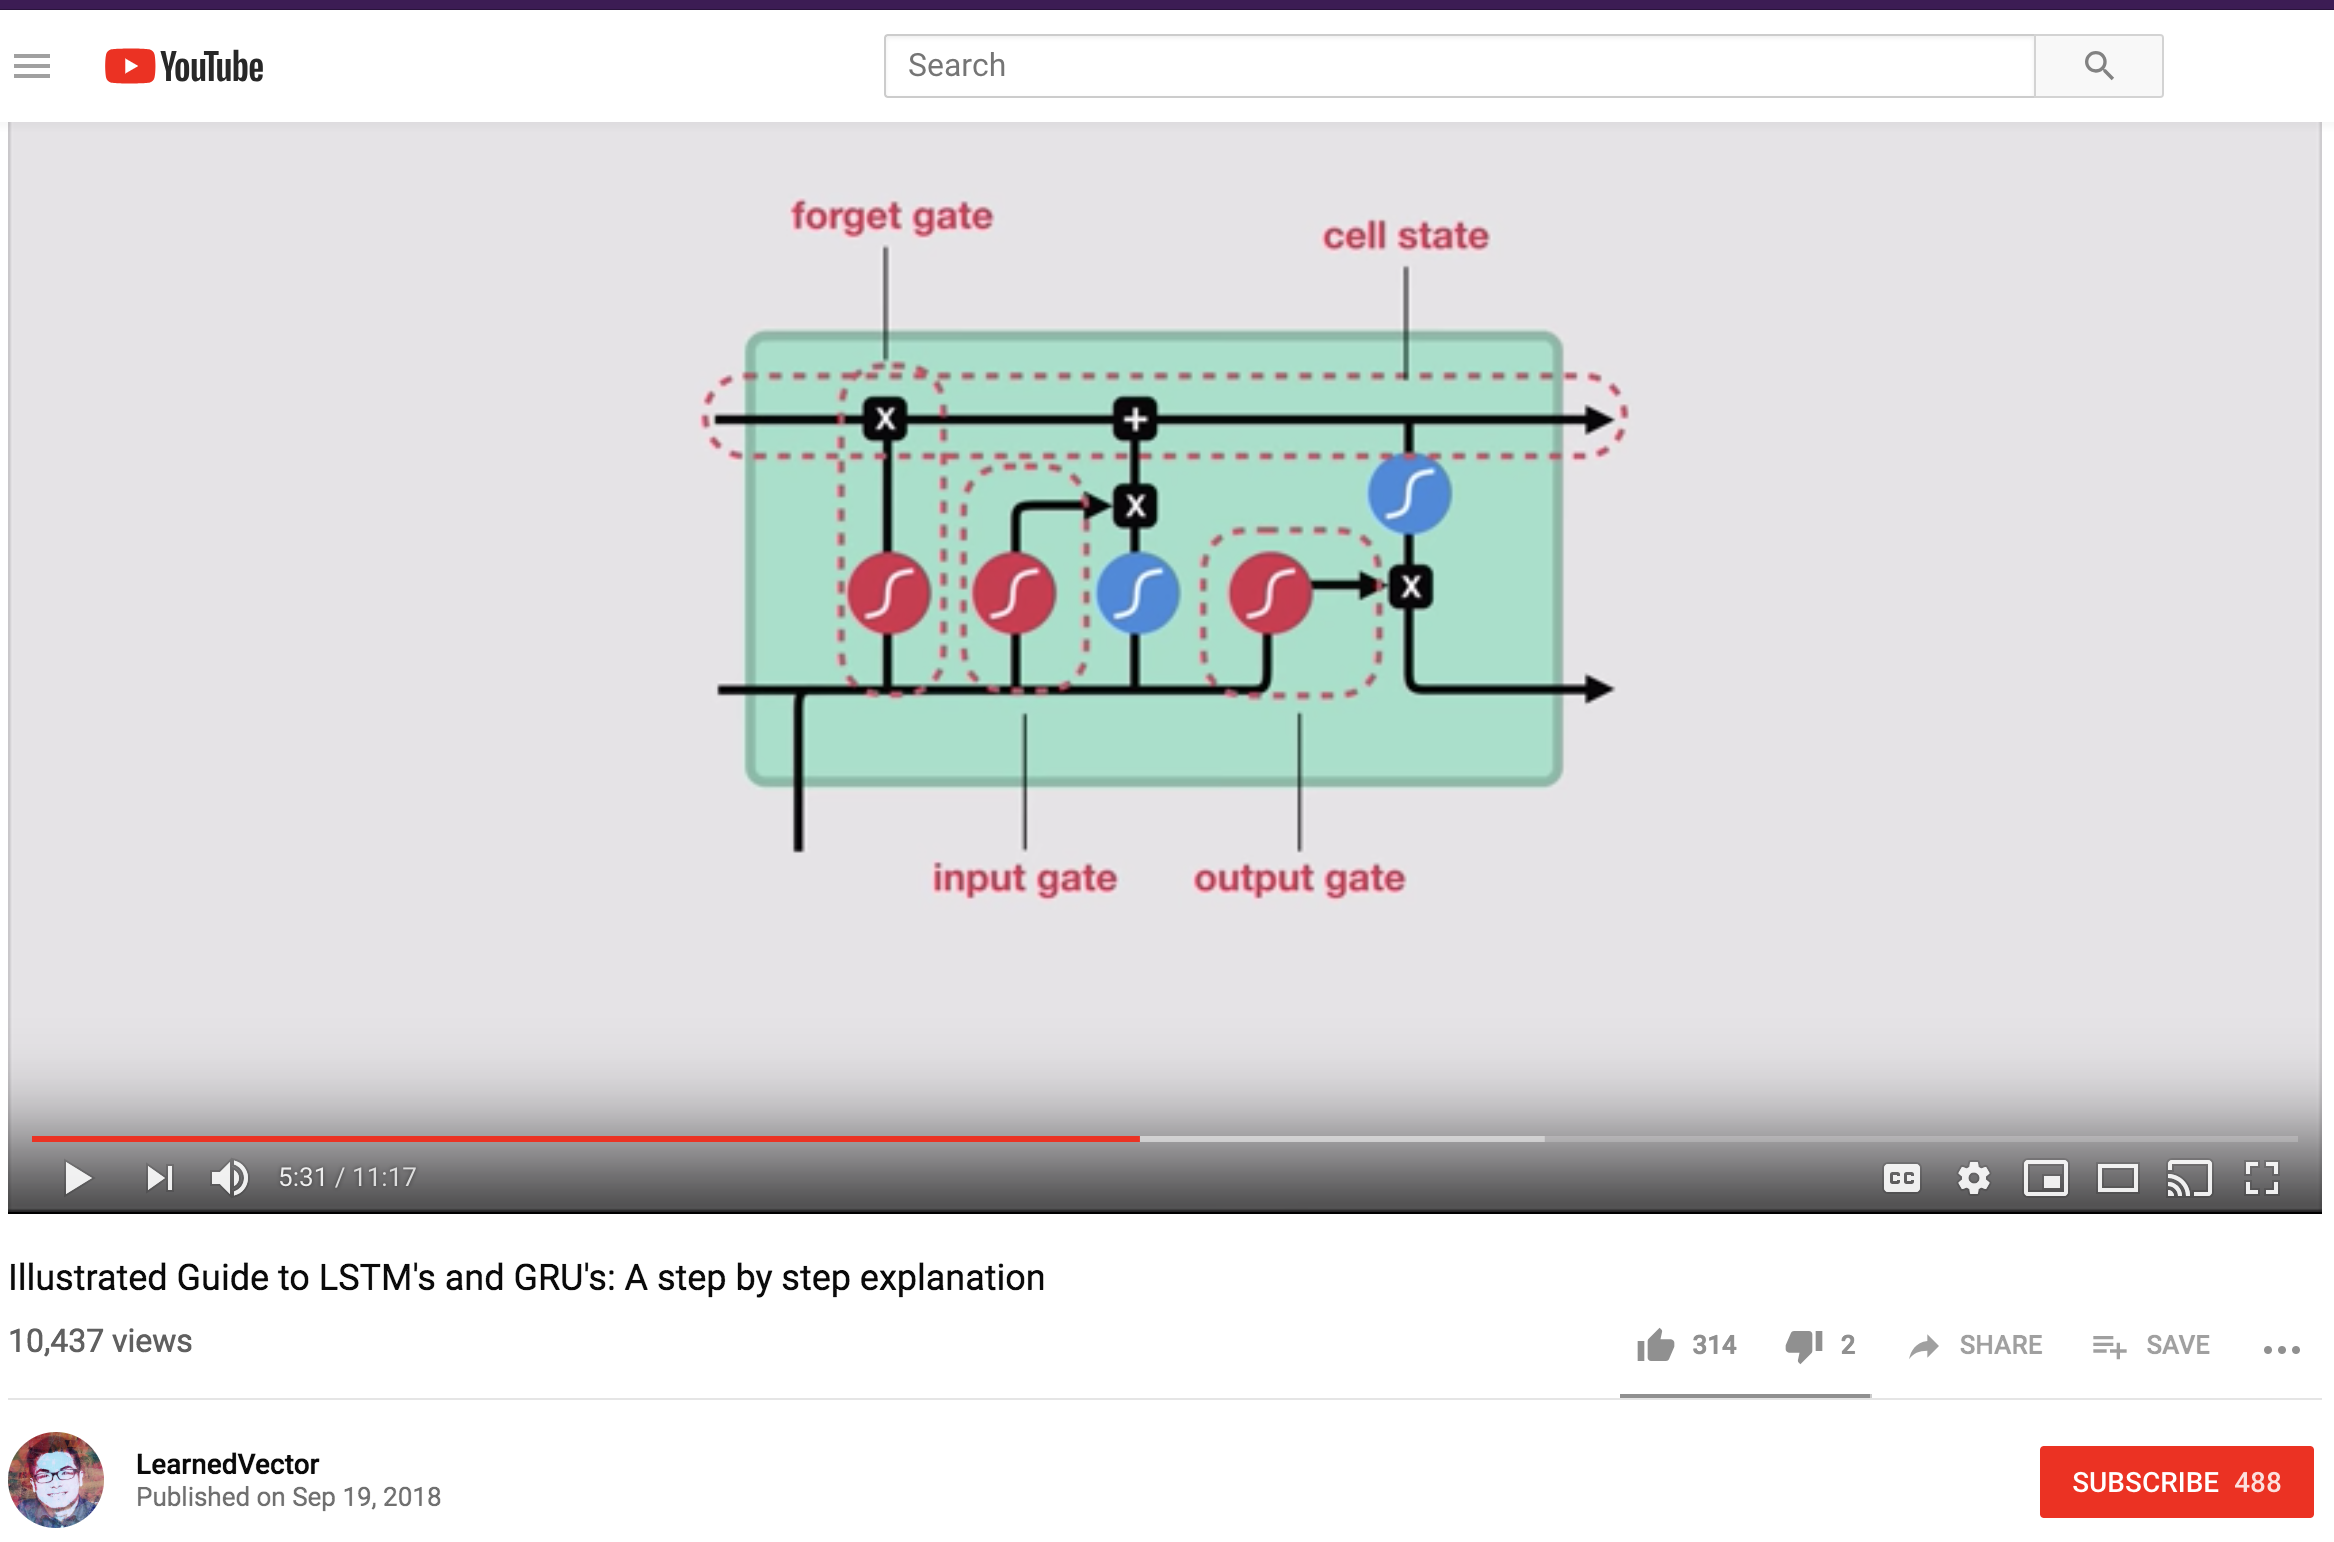

In [37]:
Image('/content/drive/My Drive/Jean Bartik Tutorial/youtube.png', width=500, height=300)

![](https://content/drive/My Drive/Jean Bartik Tutorial/youtube.png)
<a href="https://www.youtube.com/watch?v=8HyCNIVRbSU">Start at 5:28 - 9:26</a>

#Let's build our LSTM

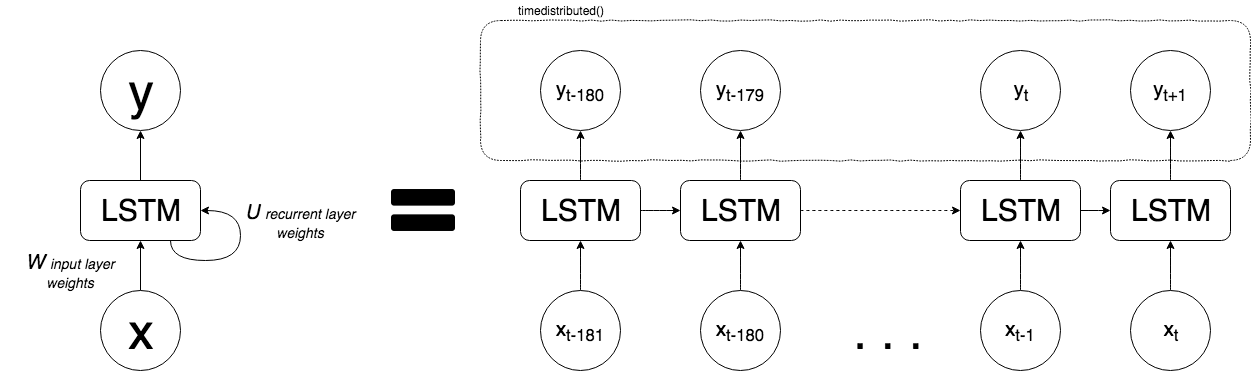

In [38]:
from IPython.display import Image
Image('/content/drive/My Drive/Jean Bartik Tutorial/timedistributed_lstm.png', width=1000, height=300)

In [0]:
from keras import layers
from keras import models
from keras import optimizers 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout,  TimeDistributed
from keras.layers import LSTM

Run the below model as is, then let's change some parameters.

In [87]:
epochs = 10 #CHANGE THE NUMBER OF EPOCHS, Note: 10 epochs runs in approximately 3.5 minutes

length=train_X.shape[1] #7448 //DO NOT CHANGE//

dims = 4 #//DO NOT CHANGE//

batch_size = 128 #CHANGE THE BATCH SIZE 

units = 128 #CHANGE THE NUMBER OF LSTM UNITS

#Design Model
model = Sequential()
model.add(LSTM(units, input_shape=(length, dims), return_sequences=True)) #NOTE - For future LSTM's, you could specificy 'input_shape = (None, dims)' where "None" means a variable sequence
#ADD ANOTHER LAYER HERE using `model.add(LSTM())`
model.add(TimeDistributed(Dense(1))) #//DO NOT CHANGE - OUTPUTS 1 PREDICTION PER TIMESTEP //
model.compile(loss='mean_absolute_error', optimizer='adam') #//CHANGE THE OPTIMIZERS LIKE optimizer='sgd', optimizer='rmsprop'

print(model.summary())

#Train Model
#there is only 1 batch so we can't train/test split this
history = model.fit(train_X, 
                    train_y, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data = (valid_X, valid_y),
                    verbose=2)

# callbacks=[TensorBoardColabCallback(tbc) #//IF YOU DECIDE TO USE TENSORBOARD - NOT IN THIS CURRENT TUTORIAL

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7448, 128)         68096     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 7448, 1)           129       
Total params: 68,225
Trainable params: 68,225
Non-trainable params: 0
_________________________________________________________________
None
Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 20s - loss: 0.7639 - val_loss: 0.4547
Epoch 2/10
 - 19s - loss: 0.6873 - val_loss: 0.4045
Epoch 3/10
 - 19s - loss: 0.5981 - val_loss: 0.3491
Epoch 4/10
 - 19s - loss: 0.5012 - val_loss: 0.2874
Epoch 5/10
 - 19s - loss: 0.3985 - val_loss: 0.2173
Epoch 6/10
 - 19s - loss: 0.3060 - val_loss: 0.1389
Epoch 7/10
 - 19s - loss: 0.2782 - val_loss: 0.0833
Epoch 8/10
 - 19s - loss: 0.2839 - val_loss: 0.0596
Epoch 9/10
 - 19s - loss: 0.2721 - val_loss: 0.0576
Epoch 10/10
 - 19s 

**save your model**

In [0]:
from keras.models import load_model

#model.save('/content/drive/My Drive/Jean Bartik Tutorial/model.h5') #//UNCOMMENT OUT AND SAVE AS ANY FILE NAME YOU LIKE

# identical to the previous one
#//OR, LOAD THIS MODEL AND KEEP THE 'model.save' COMMENTED OUT
model = load_model('/content/drive/My Drive/Jean Bartik Tutorial/model.h5')

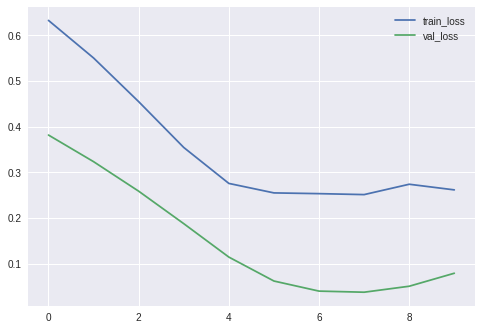

In [47]:
# plot history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#Gradients

Gradients dictate how much to update the model, i.e. what is learned, its visualization is revealing of the training process.  When we calculate the deriviate of the loss function with respect to the inputs, what we are doing is learning how sensitive (magnitude) the output (prediction) is when that specific input feature is perturbed. 

What is a gradient? 

> "a gradient is a vector of partial derivatives. Each partial derivative, by definition, gives the local rate of change of the output with respect to the corresponding input, holding the other inputs fixed." 

Ref: ftp://ftp.sas.com/pub/neural/importance.html#mlp_comp_wgt


In [0]:
from keras import backend as K


<i>Per Cashman, et al (RNNbow: Visualizing Learning via Backpropagation Gradients in Recurrent Neural Networks)</i>: https://vadl2017.github.io/paper/vadl_0107-paper.pdf

>>Given a loss function, backpropagation passes that loss back to any parameters involved in the loss’s calculation, via the chain rule. In a Convolutional Neural Network, where one prediction is made, there is generally a single loss calculation, which is then passed along via gradients. In an RNN, there are multiple losses; <b>loss is calculated at each output $y_i$</b>. Calculating the gradient of W is a difficult task since each hidden state and each output are compounded functions of W. To account for the multiple losses, RNNs use a special form of an algorithm called backpropagation through time (BPTT) [8]. To use BPTT, RNNs are unrolled - that is, each cycle in the computation graph is represented as an additional copy of the RNN, to create a directed acyclic computation graph

In [49]:
#Gradients of the predictions wrt inputs of the training set
"""
A little note about this syntax: 'K.sum', 'K.gradients', 'K.function' is calling 'model.input' and 'model.output', 
which are the first and last layers, respectively, of the Keras Functional API - so you won't be able to see
this in the model.sequential() above. However, it's stil calling the same model we just built.

"""

def gradients(output_y, input_x, model):
    v_expected = np.asarray(output_y.shape) #an array
    v_tf_expected = K.variable(v_expected) #a vector of shape v_expected: train_y the true values
    loss = K.sum(K.abs(v_tf_expected - model.output)) #loss function, where model.output are the predictions, Mean Absolute Error
    grad = K.gradients(loss, [model.input, v_tf_expected])[0] #keras.backend.gradients(loss, variables) - Returns the gradients of loss w.r.t. variables.
    fn = K.function([model.input, v_tf_expected], [grad])
    grads = fn([input_x, output_y])[0]
    print(grads.shape)
    return grads

train_grads = gradients(train_y, train_X, model)

(1, 7448, 4)


In [50]:
train_grads

array([[[-0.06720284,  0.42813006,  0.46425304, -0.09944814],
        [-0.05656112,  0.38373697,  0.42062882, -0.09517314],
        [-0.05039455,  0.33188337,  0.36989376, -0.08868714],
        ...,
        [ 0.07767835, -0.15359396, -0.18738236,  0.02145319],
        [ 0.05912727, -0.09229968, -0.12239102,  0.01295521],
        [ 0.034036  , -0.03721116, -0.05732022,  0.00506419]]],
      dtype=float32)

AxesSubplot(0.125,0.125;0.775x0.755)


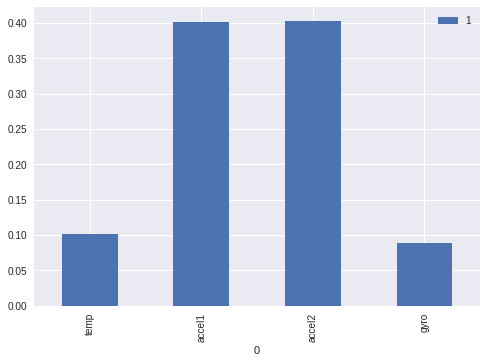

In [51]:
#plot mean of each feature

def mean_feature_gradients(grads):
    foo = (np.abs(grads).mean(axis=1)).reshape(np.abs(grads).shape[2],)
    foo1 = pd.Series((foo.transpose()))
    var_list = ['temp', 'accel1', 'accel2','gyro']
    var_list1 =pd.Series(var_list)
    print(((pd.DataFrame([var_list1, foo1]).transpose()).set_index(0)).plot(kind='bar'))
    
    
mean_feature_gradients(train_grads)

AxesSubplot(0.125,0.125;0.775x0.755)


,index,gyro,1,accel2,3,accel1,5,temp,7
0,0,-0.099448,gyro,0.464253,a2,0.428130,a1,-0.067203,temp
1,1,-0.095173,gyro,0.420629,a2,0.383737,a1,-0.056561,temp
2,2,-0.088687,gyro,0.369894,a2,0.331883,a1,-0.050395,temp
3,3,-0.081066,gyro,0.315413,a2,0.277094,a1,-0.047656,temp
4,4,-0.071114,gyro,0.256970,a2,0.219857,a1,-0.047320,temp
5,5,-0.058895,gyro,0.195317,a2,0.159526,a1,-0.049055,temp
6,6,-0.043121,gyro,0.128773,a2,0.093694,a1,-0.051903,temp
7,7,-0.023566,gyro,0.057876,a2,0.023644,a1,-0.055700,temp
8,8,-0.001071,gyro,-0.018380,a2,-0.052677,a1,-0.059610,temp
9,9,0.024319,gyro,-0.099004,a2,-0.133491,a1,-0.062776,temp


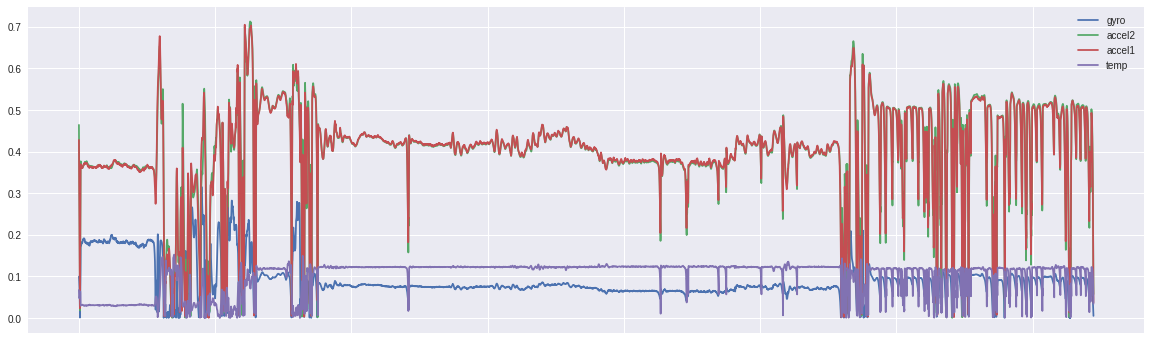

In [52]:
def gradients_viz(grads):
    gyro_grads_wrt_train = pd.Series(grads[0][:, -1])
    a2_grads_wrt_train = pd.Series(grads[0][:, -2])
    a1_grads_wrt_train = pd.Series(grads[0][:, -3])
    temp_grads_wrt_train = pd.Series(grads[0][:, -4])
    #names
    gyro_name = ['gyro'] * len(pd.Series(grads[0][:, -1]))
    a2_name = ['a2'] * len(pd.Series(grads[0][:, -2]))
    a1_name = ['a1'] * len(pd.Series(grads[0][:, -3]))
    temp_name = ['temp'] * len(pd.Series(grads[0][:, -4]))
    #dataframe
    df = pd.concat([gyro_grads_wrt_train, 
                    pd.Series(gyro_name), 
                    a2_grads_wrt_train, 
                    pd.Series(a2_name),
                    a1_grads_wrt_train,
                    pd.Series(a1_name), 
                    temp_grads_wrt_train,
                    pd.Series(temp_name)], axis=1)
    #overall df
    train_signals = df.reset_index()
    train_signals.rename(index=str, columns={0: "gyro", 
                                             2: "accel2",
                                            4: "accel1",
                                            6:"temp"}, inplace=True)
    print(np.abs(train_signals[['gyro', 'accel2', 'accel1','temp']]).plot(kind='line', figsize=(20,6)))
    return train_signals
  
  
gradients_viz(train_grads)

#Predict

<b>This forecasts for us the last 7,448 timesteps for the magnometer readings, based on having been trained on the distribution of the temperature, accel1, accel2, and gyroscope data for the first 7,448 timesteps. We inputted to the model the last 7,448 timesteps for only temperature, accel1, accl2, and gyroscope. It predicted the magnotometer readings.</b>

1/1 [==============================] - 6s 6s/step
Model MEAN ABSOLUTE ERROR IS 0.3454782962799072
(7448,)
1/1 [==============================] - 6s 6s/step
(7448,)
AxesSubplot(0.125,0.125;0.775x0.755)


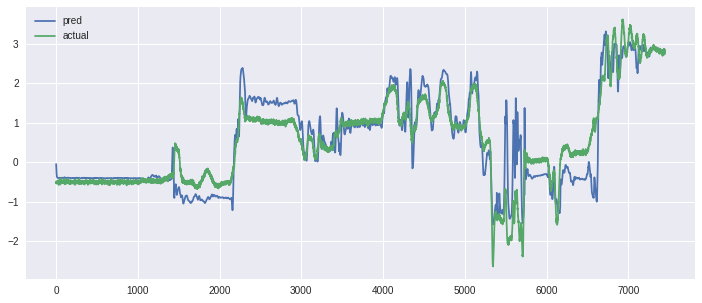

In [53]:
model_accuracy = model.evaluate(test_X, test_y)
print("Model MEAN ABSOLUTE ERROR IS", model_accuracy)

#Reshape 
y_test = pd.Series(test_y.reshape(length,))
print(y_test.shape)

def predictions(data, batch_size, seq_len):
    result = model.predict(data, batch_size, verbose=1)
    predictions = pd.Series(result.reshape(seq_len),)
    print(predictions.shape)
    return predictions
  
test_preds = predictions(test_X, 1, length)


def predictions_dataframe(predictions, series_y):
    df = pd.concat([predictions, series_y], axis=1)
    df.rename(columns={0: 'pred', 1: 'actual'}, inplace=True)
    print(df.plot(figsize=(12,5)))
    return df
  
test_df = predictions_dataframe(test_preds, y_test)  

**Other things to try**:

* Train longer to see if we can improve the accuracy
* Try predicting with another test subject
* Try building a model using one of the other tasks like vacuuming
* Experiment with GRU instead of LSTM 